# 第一步：读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 引入seaborn库，为了画相关结果的热力图
import seaborn as sns

In [2]:
data = pd.read_csv("StudentsPerformance.csv")
#data.dtypes
print(data.describe())   #查看数据统计信息

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [3]:
df = pd.DataFrame(data)   # The pandas object holding the data.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#统计分类数据详情
print("有多少个种族：")
print(df['race/ethnicity'].nunique())
#gender,race/ethnicity,parental level of education,lunch,test preparation course
print("有多少个性别：")
print(df['gender'].nunique())
print("有多少种受教育背景：")
print(df['parental level of education'].nunique())
print("午餐消费习惯种类：")
print(df['lunch'].nunique())
print("课程准备情况：")
print(df['test preparation course'].nunique())

有多少个种族：
5
有多少个性别：
2
有多少种受教育背景：
6
午餐消费习惯种类：
2
课程准备情况：
2


# 基本画图语句练习

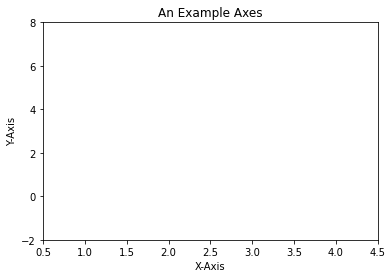

In [5]:
# 空白图纸，注意参数
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',   ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

[Text(0.5, 1.0, 'Lower Right')]

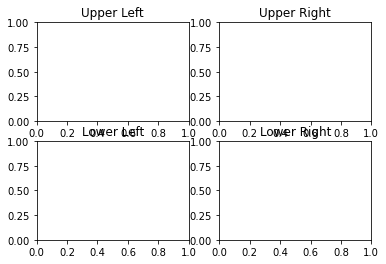

In [6]:
# 画多张子图
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# 第二步 观察数据规律：

# 2.1 直方图

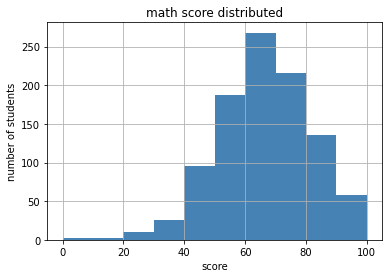

In [8]:
df['math score'].hist(bins=10,color="steelblue")
plt.ylabel("number of students")
plt.xlabel("score")
plt.title("math score distributed")
plt.show()

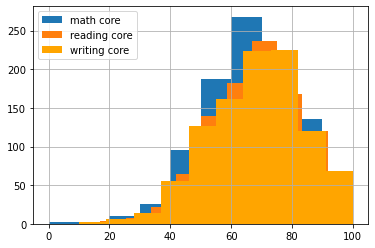

In [9]:
# 多图叠加结果
df['math score'].hist(label='math core',bins=10)
df['reading score'].hist(label='reading core',bins=10)
df['writing score'].hist(color='orange',label='writing core',bins=10)
plt.legend(loc="upper left")
plt.show()

写作和阅读成绩100份切片的直方图结果

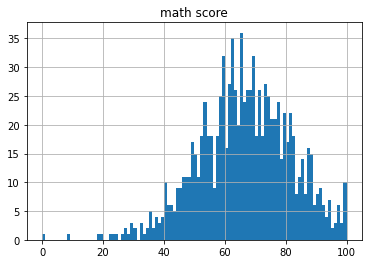

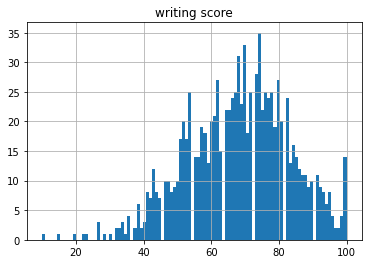

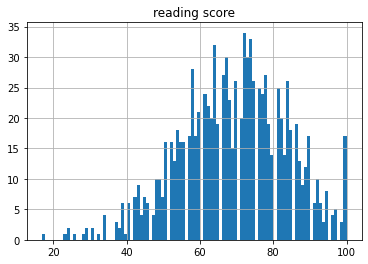

In [10]:
# bin max value =100 ; 查看所有成绩分布的细节
# alpha 代表重叠的透明度，如果是 0.9，表示 90% 的颜色为 'b'
# bins 代表一组数据有多少根柱子，即把数据分成多少份

df['math score'].hist(bins=100)
plt.title('math score')
plt.show()
df['writing score'].hist(bins=100)
plt.title('writing score')
plt.show()
df['reading score'].hist(bins=100)
plt.title('reading score')
plt.show()

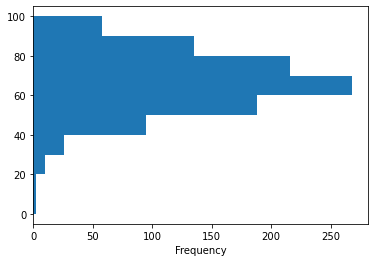

In [11]:
#水平直方图
df['math score'].plot.hist(orientation='horizontal')
plt.show()

# 2.2 散点图

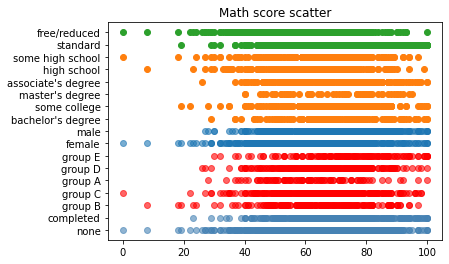

In [12]:
x=df['math score']
y1=df['test preparation course']
y2=df['race/ethnicity']
y3=df['gender']
y4=df['parental level of education']
y5=df['lunch']
plt.scatter(x, y1, color="steelblue",alpha=0.6)  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
plt.scatter(x, y2, color="red",alpha=0.6)
plt.scatter(x, y3, alpha=0.6)
plt.scatter(x,y4)
plt.scatter(x,y5)
plt.title('Math score scatter')
plt.show()

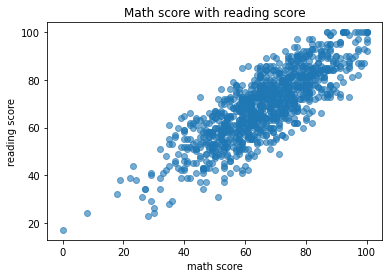

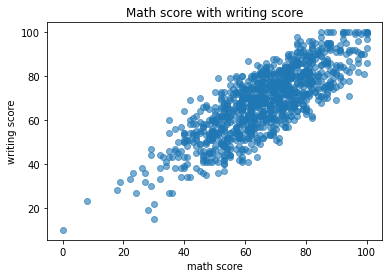

In [13]:
# 散点图：各科成绩之间的相关性
math_score=df['math score']
reading_score=df['reading score']
writing_score=df['writing score']

plt.scatter( math_score,reading_score,alpha=0.6)
plt.title('Math score with reading score')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

plt.scatter( math_score,writing_score,alpha=0.6)
plt.title('Math score with writing score')
plt.xlabel('math score')
plt.ylabel('writing score')
plt.show()


作业：根据上面的例子，补充阅读成绩和写作成绩之间的散点图

In [14]:
data = pd.read_csv("StudentsPerformance.csv")
df = pd.DataFrame(data)   # The pandas object holding the data.

#提取math score；reading score；writing score 
score_data=pd.DataFrame({'math_score':df['math score'],'reading_score':df['reading score'],'writing_score':df['writing score']})
dcorr=score_data.corr()
display(dcorr) # 表格形式显示数据

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


<AxesSubplot:>

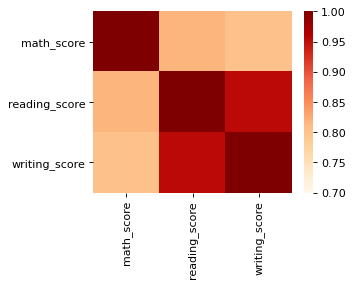

In [15]:
#画热力图（相关系数）
plt.figure(figsize=(4,3),dpi=80)  # dpi调整图像大小
sns.heatmap(data=dcorr,vmax=1,vmin=0.7,cmap="OrRd") #vmax,vmin 是色柱最大值; cmap调整颜色

# 一元回归结果分析，报告中要解释参数的意义。

In [16]:

import statsmodels.api as sm
# 小写的 ols 函数才会自带截距项，OLS 则不会。
#先通过 sm.add_constant() 向矩阵 X 添加截距列后，再用 sm.OLS() 建立普通#最小二乘模型，最后用 model.fit() 就能实现线性回归模型的拟合，并返拟合与统计分析的结果摘要。
data = pd.read_csv("StudentsPerformance.csv")
df = pd.DataFrame(data)   # The pandas object holding the data.
x1=df['writing score']
X = sm.add_constant(x1) 
model=sm.OLS(df['reading score'],X)
results = model.fit()
print(results.summary()) 


                            OLS Regression Results                            
Dep. Variable:          reading score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        10:33:54   Log-Likelihood:                -2888.5
No. Observations:                1000   AIC:                             5781.
Df Residuals:                     998   BIC:                             5791.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.7505      0.632     10.685

OLS model: Y = b0 + b1 * x
Parameters:  const            6.750505
writing score    0.917191
dtype: float64


[Text(0.5, 1.0, 'Writing fitting with reading'),
 Text(0, 0.5, 'reading score'),
 Text(0.5, 0, 'writing score')]

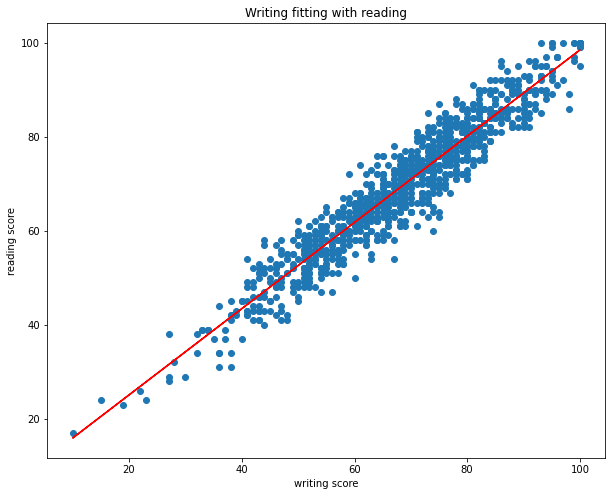

In [17]:
print("OLS model: Y = b0 + b1 * x") # b0: 回归直线的截距，b1: 回归直线的斜率
print('Parameters: ', results.params) # 输出：拟合模型的系数
yFit = results.fittedvalues # 拟合模型计算出的 y值
fig = plt.figure(figsize=(10, 8))
ax = fig.subplots()
ax.plot(x1, df['reading score'], 'o', label="data") # 原始数据
ax.plot(x1, yFit, 'r-', label="OLS") # 拟合数据
ax.set(title='Writing fitting with reading',ylabel='reading score',xlabel='writing score')

# 解释下面图所表示的信息。

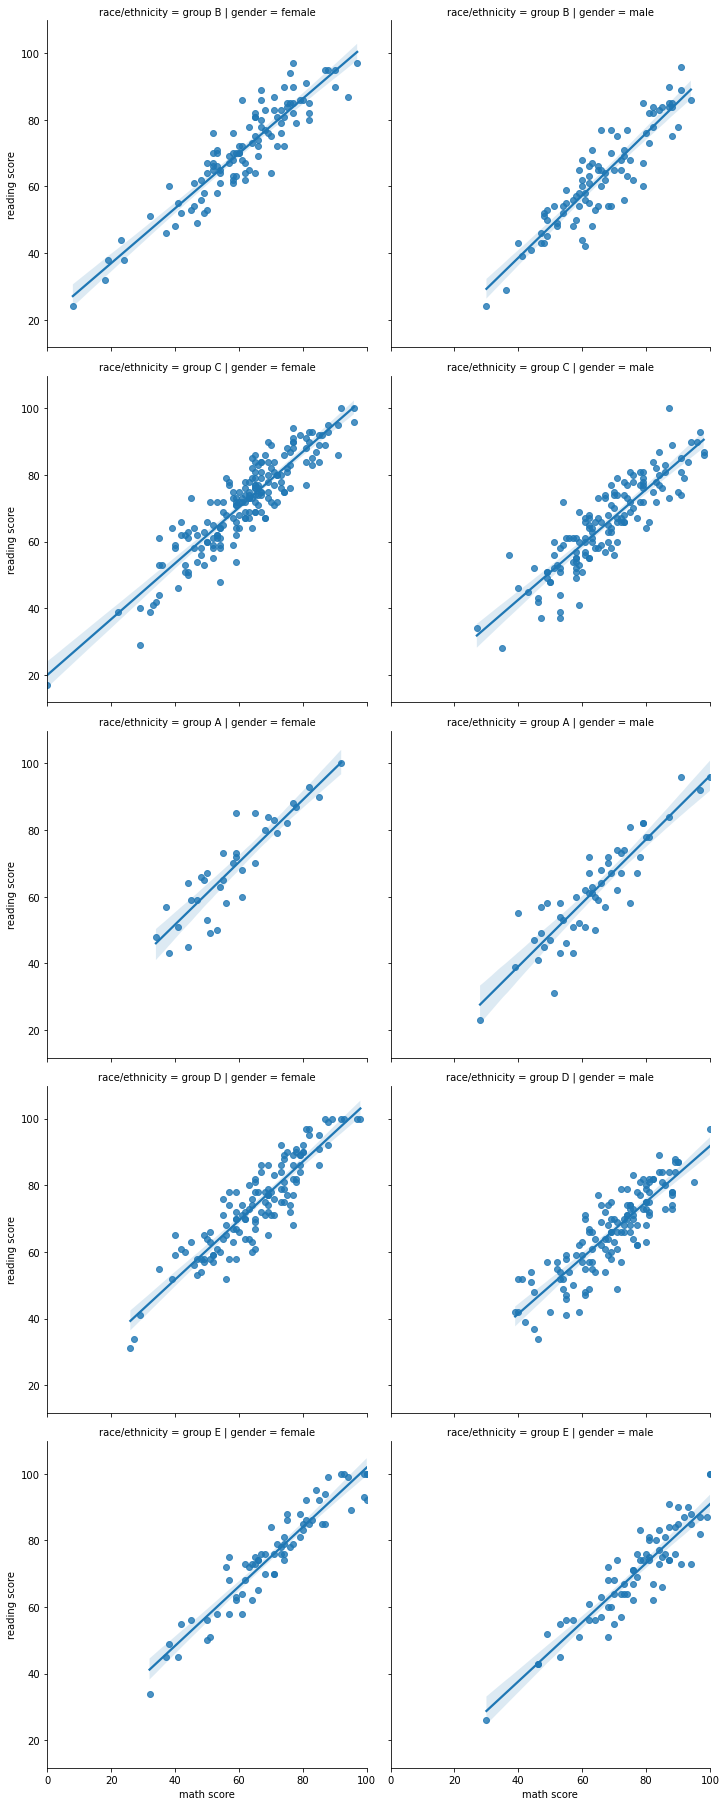

In [18]:
sns.lmplot(x="math score",y="reading score",
           data=df ,row="race/ethnicity",col="gender"
           )

# 结合箱线图，说明不同种族学生成绩分布情况。

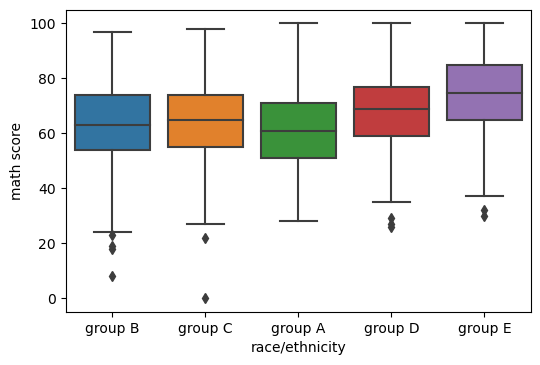

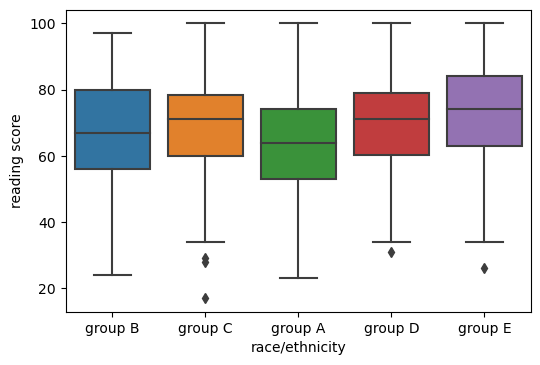

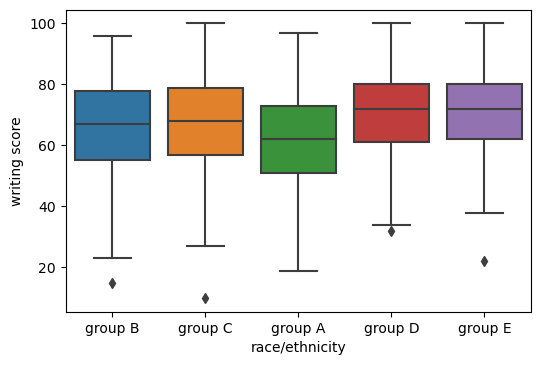

In [9]:
plt.figure(dpi=100)
sns.boxplot(x='race/ethnicity',
            y='math score',
            data=df,#data的作用就是x，y每次不需要输入pd_iris
            orient='v'
           )
plt.show()

plt.figure(dpi=100)
sns.boxplot(x='race/ethnicity',
            y='reading score',
            data=df,#data的作用就是x，y每次不需要输入pd_iris
            orient='v'
           )
plt.show()

plt.figure(dpi=100)
sns.boxplot(x='race/ethnicity',
            y='writing score',
            data=df,#data的作用就是x，y每次不需要输入pd_iris
            orient='v'
           )
plt.show()

# 结合箱线图，分析家长教育背景不同对学生成绩的影响。

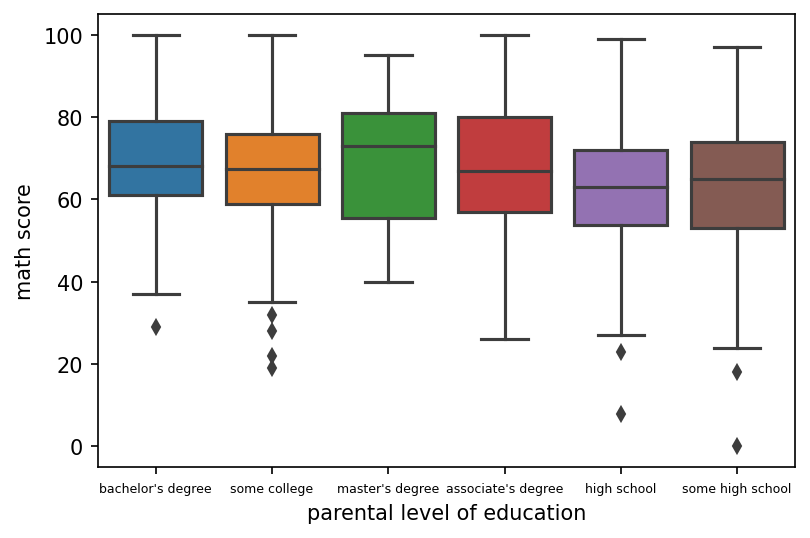

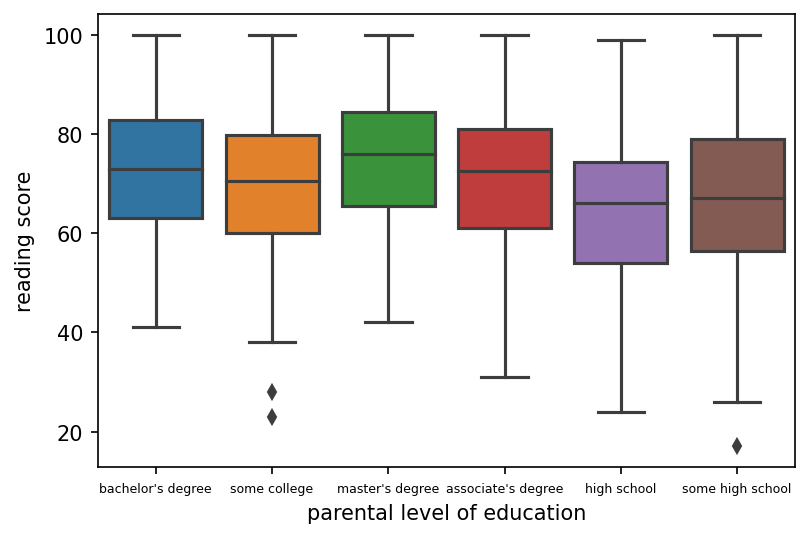

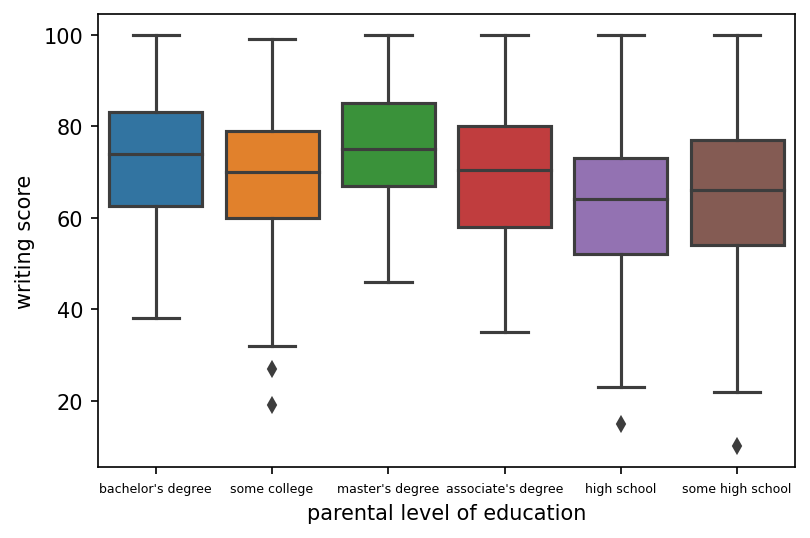

In [16]:
plt.figure(dpi=150)
plt.xticks(fontsize=6)
sns.boxplot(x='parental level of education',
            y='math score',
            data=df,#data的作用就是x，y每次不需要输入pd_iris
            orient='v'
           )
plt.show()

plt.figure(dpi=150)
plt.xticks(fontsize=6)
sns.boxplot(x='parental level of education',
            y='reading score',
            data=df,#data的作用就是x，y每次不需要输入pd_iris
            orient='v'
           )
plt.show()

plt.figure(dpi=150)
plt.xticks(fontsize=6)
sns.boxplot(x='parental level of education',
            y='writing score',
            data=df,#data的作用就是x，y每次不需要输入pd_iris
            orient='v'
           )
plt.show()